## 導入模組

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 導入資料並檢視

In [1]:
from tensorflow.keras.datasets import fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [6]:
np.max(x_train[1]),np.max(x_test[1])

(255, 255)

確認像素最大值為255

## 確認過資料後，修改資料格式

In [7]:
x_train=x_train.reshape(60000,28,28,1)/255

In [8]:
x_test=x_test.reshape(10000,28,28,1)/255

In [ ]:
ㄎ

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

修改資料為onehotencoding

## 導入模組

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

## 打造CNN

### 修改:Filter用4x4的矩陣，數量為8,16,32。最後隱藏層改用兩層，第一層為38個神經元，第二層為87個

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(8, (4,4), padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Conv2D(16, (4,4), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Conv2D(32, (4,4), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(38, activation='relu'))

In [18]:
model.add(Dense(87, activation='relu'))

In [19]:
model.add(Dense(10, activation='softmax'))

## 檢視神經網路並組合

### 修改:lr=0.05

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         136       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

In [26]:
model.compile(loss='mse', optimizer=SGD(lr=0.05),metrics=['accuracy'])

## 訓練資料

### 修改:batchsize用99個修正一次，epochs改跑10次

In [27]:
model.fit(x_train, y_train, batch_size=99, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 320us/sample - loss: 0.0900 - accuracy: 0.1614
Epoch 2/10
60000/60000 [==============================] - 21s 348us/sample - loss: 0.0898 - accuracy: 0.1935
Epoch 3/10
60000/60000 [==============================] - 22s 370us/sample - loss: 0.0895 - accuracy: 0.1949
Epoch 4/10
60000/60000 [==============================] - 22s 361us/sample - loss: 0.0891 - accuracy: 0.2151
Epoch 5/10
60000/60000 [==============================] - 21s 352us/sample - loss: 0.0883 - accuracy: 0.2408
Epoch 6/10
60000/60000 [==============================] - 21s 351us/sample - loss: 0.0855 - accuracy: 0.2958
Epoch 7/10
60000/60000 [==============================] - 20s 338us/sample - loss: 0.0625 - accuracy: 0.5459
Epoch 8/10
60000/60000 [==============================] - 20s 339us/sample - loss: 0.0401 - accuracy: 0.7096
Epoch 9/10
60000/60000 [==============================] - 20s 340us/sample - loss: 0.0358 - accuracy: 0.7

### 這準確率和速度看來有點慘，所以試著修改了lr提升為0.5，batchsize降低為20。

## 修改後

In [41]:
model = Sequential()
model.add(Conv2D(8, (4,4), padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (4,4), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (4,4), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(38, activation='relu'))
model.add(Dense(87, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mse', optimizer=SGD(lr=0.5),metrics=['accuracy'])

In [42]:
model.fit(x_train, y_train, batch_size=20, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 487us/sample - loss: 0.0375 - accuracy: 0.7151
Epoch 2/10
60000/60000 [==============================] - 29s 491us/sample - loss: 0.0212 - accuracy: 0.8524
Epoch 3/10
60000/60000 [==============================] - 30s 504us/sample - loss: 0.0180 - accuracy: 0.8763
Epoch 4/10
60000/60000 [==============================] - 31s 524us/sample - loss: 0.0165 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 31s 511us/sample - loss: 0.0155 - accuracy: 0.8934
Epoch 6/10
60000/60000 [==============================] - 31s 522us/sample - loss: 0.0148 - accuracy: 0.8985
Epoch 7/10
60000/60000 [==============================] - 32s 534us/sample - loss: 0.0143 - accuracy: 0.9021
Epoch 8/10
60000/60000 [==============================] - 30s 504us/sample - loss: 0.0136 - accuracy: 0.9071
Epoch 9/10
60000/60000 [==============================] - 31s 523us/sample - loss: 0.0132 - accuracy: 0.9

### 準確率是到了91%，但是速度真的令人有點堪憂:((

## 預測

In [47]:
result = model.predict_classes(x_test)

In [48]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def cnn(n):
    print("我的CNN預測是",class_names[result[n]])
    x=x_test[n].reshape(28,28)
    plt.imshow(x)

我的CNN預測是 Coat


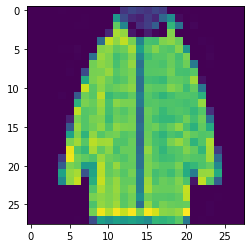

In [56]:
cnn(888)

In [57]:
from ipywidgets import interact_manual
interact_manual(cnn,n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.cnn(n)>

## 測試資料正確性

In [58]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0154 - accuracy: 0.8949


In [59]:
loss, acc = score

In [66]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.8949


### 看來沒有偏離太多，應該是沒事?!

## 將model保存

In [63]:
model.save('myCNNmodel.h5')